In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


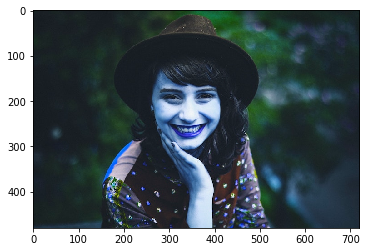

In [14]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
import cv2

img = cv2.imread("/content/drive/My Drive/woman3.jpg", cv2.IMREAD_COLOR)
plt.imshow(img); plt.show()


In [0]:
# Define the helper function
def decode_segmap(image, nc=21):
  
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (255, 255, 255), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (255, 255, 255),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
    
  rgb = np.stack([r, g, b], axis=2)
  return rgb

In [0]:
alpha.shape

(507, 760, 3)

In [0]:
from google.colab import files
import torchvision.transforms as T
import numpy as np

def segment(net, path, show_orig=True, dev='cuda'):
  img = Image.open(path)
  if show_orig: plt.imshow(img); plt.axis('off'); plt.show()
  # Comment the Resize and CenterCrop for better inference results
  trf = T.Compose([#T.Resize(640), 
                   #T.CenterCrop(224), 
                   T.ToTensor(), 
                   T.Normalize(mean = [0.485, 0.456, 0.406], 
                               std = [0.229, 0.224, 0.225])])
  inp = trf(img).unsqueeze(0).to(dev)
  out = net.to(dev)(inp)['out']
  om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
  rgb = decode_segmap(om)
  plt.imshow(rgb); plt.axis('off'); plt.show()
  cv2.imwrite('mask2.png' , rgb)
  files.download('mask2.png')
  return rgb



In [0]:
from torchvision import models

dlab = models.segmentation.deeplabv3_resnet101(pretrained=1).eval()

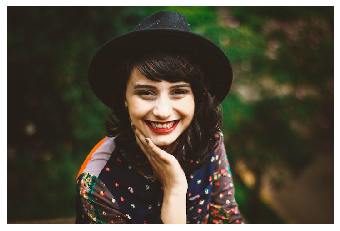

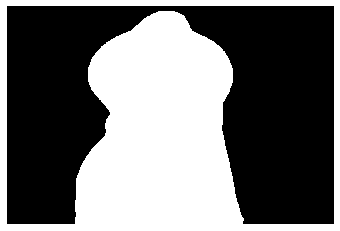

In [18]:

rgb=segment(dlab, '/content/drive/My Drive/woman3.jpg')

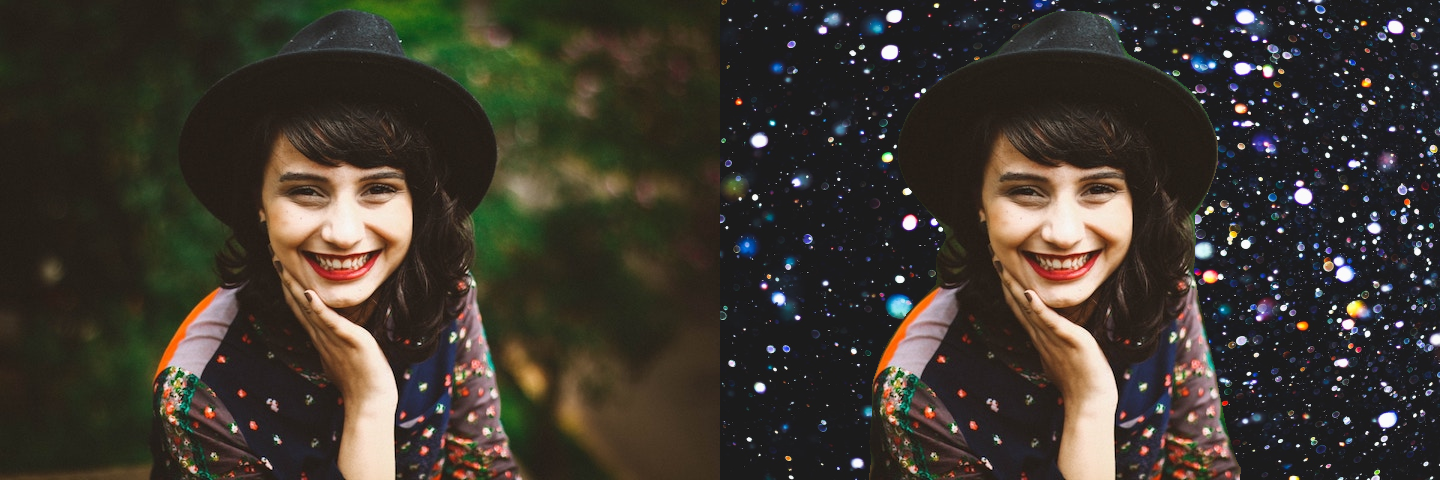

In [0]:
#alpha blending to customize the background of the image
from google.colab import files
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Read the images
foreground = cv2.imread("/content/drive/My Drive/woman3.jpg")
background = cv2.imread("/content/drive/My Drive/light.jpg", cv2.IMREAD_COLOR)
background = cv2.resize(background, (rgb.shape[1],rgb.shape[0]), interpolation = cv2.INTER_AREA)

alpha = rgb

# Convert uint8 to float
foreground = foreground.astype(float)
background = background.astype(float)
 
# Normalize the alpha mask to keep intensity between 0 and 1
alpha = alpha.astype(float)/255
 

 
# Multiply the foreground with the alpha matte
foreground = cv2.multiply(alpha, foreground)
 
# Multiply the background with ( 1 - alpha )
background = cv2.multiply(1.0 - alpha, background)
 
# Add the masked foreground and background.
outImage = cv2.add(foreground, background)
 
numpy_horizontal = np.hstack((img, outImage))

numpy_horizontal_concat = np.concatenate((img, outImage), axis=1)
# Display image
cv2_imshow(numpy_horizontal_concat)
cv2.waitKey(0)
# Display image
cv2.imwrite('res.png' , numpy_horizontal_concat)
files.download('res.png')





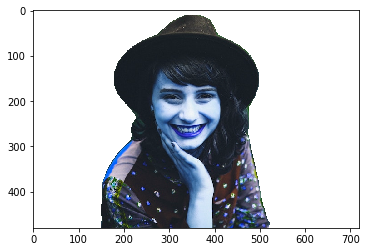

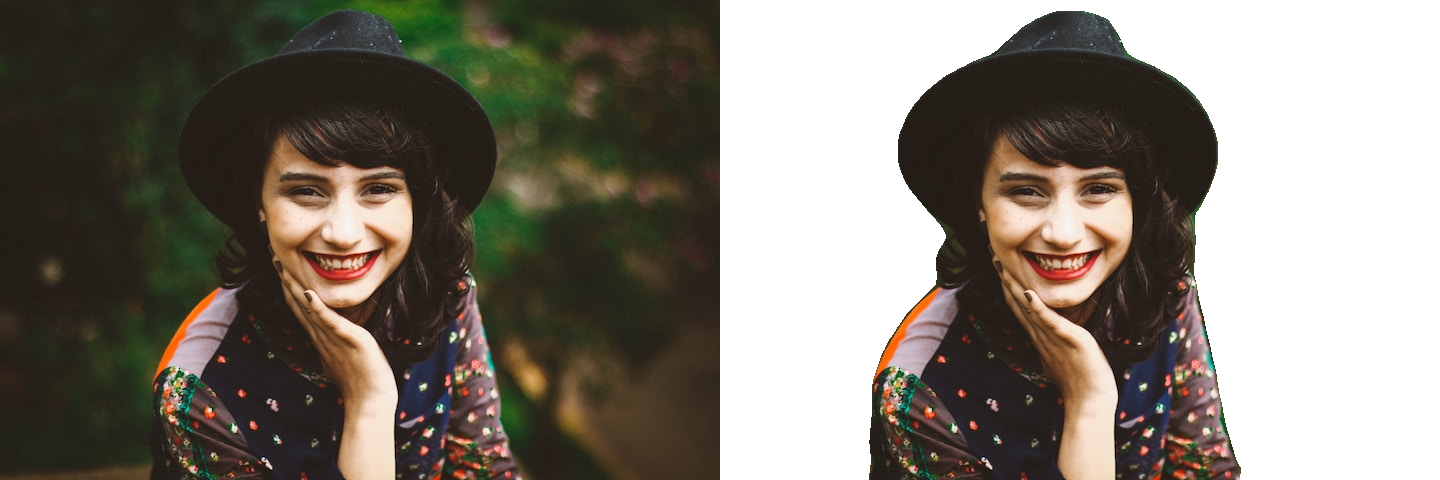

MessageError: ignored

In [20]:
#whiten the background of the image
import cv2
from google.colab.patches import cv2_imshow

mask_out=cv2.subtract(rgb,img)
mask_out=cv2.subtract(rgb,mask_out)
mask_out[rgb == 0] = 255
plt.imshow(mask_out); plt.show()
cv2.imwrite('out4.jpeg' , mask_out)
numpy_horizontal = np.hstack((img, mask_out))

numpy_horizontal_concat = np.concatenate((img, mask_out), axis=1)
# Display image
cv2_imshow(numpy_horizontal_concat)
cv2.waitKey(0)
# Display image
cv2.imwrite('res.png' , numpy_horizontal_concat)
files.download('res.png')

In [0]:
rgb[rgb!=255]=0

In [0]:
rgb

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

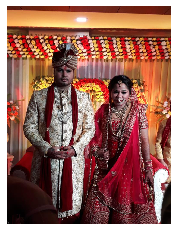

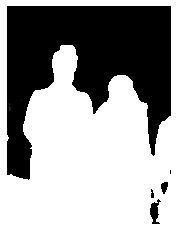

In [0]:
rgb=segment(dlab, '/content/drive/My Drive/marriage.jpeg')

In [0]:
# !apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
# import cv2

In [0]:
# out1=segment(dlab, '/content/drive/My Drive/image1.png')

In [0]:
from google.colab import files

files.download('out_prity3.png') 

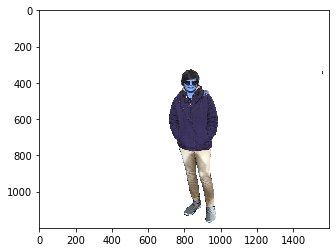

True

In [0]:
import cv2
mask_out=cv2.subtract(rgb,img)
mask_out=cv2.subtract(rgb,mask_out)
mask_out[rgb == 0] = 255
plt.imshow(mask_out); plt.show()
cv2.imwrite('out_prity3.png' , mask_out)

In [0]:
rgb.shape

(1024, 768, 3)

In [0]:
img.shape

(1024, 768, 3)

In [0]:
img = cv2.imread("/content/drive/My Drive/out_prity3.png", cv2.IMREAD_COLOR)


In [0]:
segment(dlab, path="/content/drive/My Drive/out_prity3.png", show_orig=False)